In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
start = '2010-01-01'
end = '2020-01-31'

# df - dataframe
df = data.DataReader('AAPL', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2007-12-31,7.160714,7.062500,7.125000,7.074286,5.393332e+08,6.048641
2008-01-02,7.152143,6.876786,7.116786,6.958571,1.079179e+09,5.949702
2008-01-03,7.049643,6.881786,6.978929,6.961786,8.420664e+08,5.952452
2008-01-04,6.892857,6.388929,6.837500,6.430357,1.455832e+09,5.498071
2008-01-07,6.557143,6.079643,6.473214,6.344286,2.072193e+09,5.424478


In [3]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,71.222504,70.730003,71.172501,71.067497,48478800.0,69.835602
2019-12-26,72.495003,71.175003,71.205002,72.477501,93121200.0,71.221153
2019-12-27,73.492500,72.029999,72.779999,72.449997,146266000.0,71.194138
2019-12-30,73.172501,71.305000,72.364998,72.879997,144114400.0,71.616669
2019-12-31,73.419998,72.379997,72.482498,73.412498,100805600.0,72.139946


In [4]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2007-12-31,7.160714,7.062500,7.125000,7.074286,5.393332e+08,6.048641
1,2008-01-02,7.152143,6.876786,7.116786,6.958571,1.079179e+09,5.949702
2,2008-01-03,7.049643,6.881786,6.978929,6.961786,8.420664e+08,5.952452
3,2008-01-04,6.892857,6.388929,6.837500,6.430357,1.455832e+09,5.498071
4,2008-01-07,6.557143,6.079643,6.473214,6.344286,2.072193e+09,5.424478


In [5]:
df = df.drop(['Date','Adj Close'], axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,7.160714,7.062500,7.125000,7.074286,5.393332e+08
1,7.152143,6.876786,7.116786,6.958571,1.079179e+09
2,7.049643,6.881786,6.978929,6.961786,8.420664e+08
3,6.892857,6.388929,6.837500,6.430357,1.455832e+09
4,6.557143,6.079643,6.473214,6.344286,2.072193e+09


In [6]:
df

,High,Low,Open,Close,Volume
0,7.160714,7.062500,7.125000,7.074286,5.393332e+08
1,7.152143,6.876786,7.116786,6.958571,1.079179e+09
2,7.049643,6.881786,6.978929,6.961786,8.420664e+08
3,6.892857,6.388929,6.837500,6.430357,1.455832e+09
4,6.557143,6.079643,6.473214,6.344286,2.072193e+09
...,...,...,...,...,...
3017,71.222504,70.730003,71.172501,71.067497,4.847880e+07
3018,72.495003,71.175003,71.205002,72.477501,9.312120e+07
3019,73.492500,72.029999,72.779999,72.449997,1.462660e+08
3020,73.172501,71.305000,72.364998,72.879997,1.441144e+08


In [7]:
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3017    59.401700
3018    59.643125
3019    59.875125
3020    60.106325
3021    60.331875
Name: Close, Length: 3022, dtype: float64

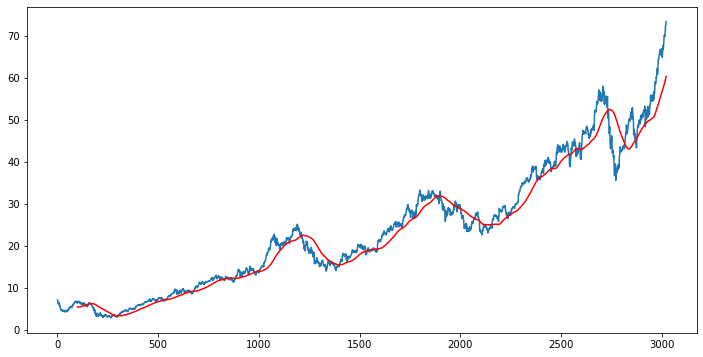

In [8]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'red')

In [8]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3017    54.261513
3018    54.396763
3019    54.529350
3020    54.661100
3021    54.793137
Name: Close, Length: 3022, dtype: float64

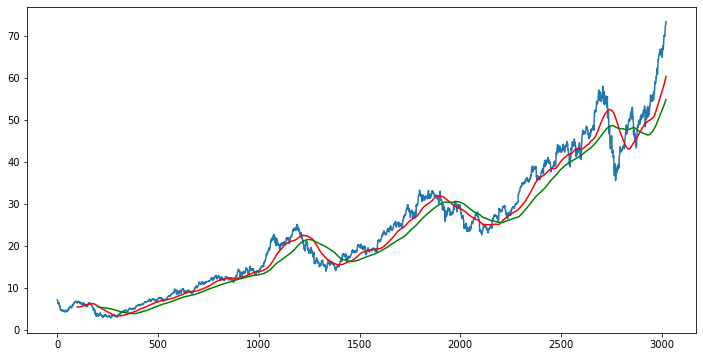

In [9]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'red')
plt.plot(ma200, 'green')

In [10]:
df.shape


(3022, 5)

In [11]:
# splitting data into training and testing 

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2115, 1)
(907, 1)


In [12]:
data_training.head()

,Close
0,7.074286
1,6.958571
2,6.961786
3,6.430357
4,6.344286


In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [14]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.14057225],
       [0.13677297],
       [0.13687853],
       ...,
       [0.68989213],
       [0.69982411],
       [0.71189026]])

In [15]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [17]:
# ML model

In [16]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential 

In [17]:
model = Sequential()
model.add(LSTM(units= 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units= 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units= 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units= 120, activation = 'relu'))
model.add(Dropout(0.4))

model.add(Dense(units=1))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [19]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
63/63 [==============================] - 32s 379ms/step - loss: 0.0483
Epoch 2/50
63/63 [==============================] - 25s 400ms/step - loss: 0.0083
Epoch 3/50
63/63 [==============================] - 29s 461ms/step - loss: 0.0066
Epoch 4/50
63/63 [==============================] - 28s 452ms/step - loss: 0.0058
Epoch 5/50
63/63 [==============================] - 29s 454ms/step - loss: 0.0055
Epoch 6/50
63/63 [==============================] - 28s 451ms/step - loss: 0.0052
Epoch 7/50
63/63 [==============================] - 28s 445ms/step - loss: 0.0051
Epoch 8/50
63/63 [==============================] - 28s 450ms/step - loss: 0.0047
Epoch 9/50
63/63 [==============================] - 25s 402ms/step - loss: 0.0050
Epoch 10/50
63/63 [==============================] - 23s 370ms/step - loss: 0.0044
Epoch 11/50
63/63 [==============================] - 28s 446ms/step - loss: 0.0044
Epoch 12/50
63/63 [==============================] - 31s 482ms/step - loss: 0.0038
Epoch 13/50
6

In [20]:
model.save('keras_model.h5')

In [21]:
data_testing.head()

,Close
2115,24.905001
2116,25.102501
2117,25.087500
2118,24.965000
2119,24.615000


In [22]:
past_100_days = data_training.tail(100)

In [23]:
final_df = past_100_days.append(data_testing, ignore_index = True)

C:\Users\jitesh\AppData\Local\Temp\ipykernel_22836\3299050086.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index = True)


In [24]:
final_df.head()

,Close
0,26.315001
1,26.337500
2,25.677500
3,25.174999
4,24.112499


In [25]:
input_data = scaler.fit_transform(final_df)

In [29]:
input_data

array([[0.0733855 ],
       [0.07382816],
       [0.06084306],
       ...,
       [0.98106337],
       [0.98952336],
       [1.        ]])

In [26]:
input_data.shape

(1007, 1)

In [27]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i,0])

In [28]:
x_test ,y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(907, 100, 1)
(907,)


In [29]:
# making prediction 

y_predicted = model.predict(x_test)

In [30]:
y_predicted.shape

(907, 1)

In [31]:
y_test

array([0.04564461, 0.04953031, 0.04923517, 0.04682507, 0.03993902,
       0.03629927, 0.03728298, 0.04077518, 0.04274262, 0.04229997,
       0.04579217, 0.04175892, 0.03443018, 0.03502043, 0.03344648,
       0.03546312, 0.02454383, 0.02341253, 0.02739662, 0.02562592,
       0.02833113, 0.01505093, 0.00836164, 0.01598544, 0.01996953,
       0.02587183, 0.02729823, 0.02287148, 0.02552753, 0.02754417,
       0.03118393, 0.03265952, 0.03482368, 0.03211847, 0.04156217,
       0.04151297, 0.04667752, 0.04687426, 0.04731692, 0.04471007,
       0.04092277, 0.03443018, 0.03113473, 0.06202351, 0.06886036,
       0.06822096, 0.0772712 , 0.069549  , 0.07599235, 0.07638585,
       0.08430479, 0.08868234, 0.0908465 , 0.08686245, 0.08651815,
       0.08774779, 0.09414199, 0.0936501 , 0.09286314, 0.09217454,
       0.09355174, 0.08937094, 0.09104325, 0.08701   , 0.08474745,
       0.08164874, 0.0810585 , 0.07702525, 0.0775171 , 0.08061584,
       0.08553444, 0.08538685, 0.08863314, 0.07466431, 0.06290

In [32]:
y_predicted

array([[0.07658511],
       [0.07814977],
       [0.08015054],
       [0.0825502 ],
       [0.0852612 ],
       [0.08813122],
       [0.09096615],
       [0.09357782],
       [0.09582302],
       [0.09761402],
       [0.09890994],
       [0.09973401],
       [0.10012645],
       [0.10010707],
       [0.09971482],
       [0.09900339],
       [0.09805429],
       [0.09690118],
       [0.09557119],
       [0.09412771],
       [0.09263825],
       [0.09118298],
       [0.08977054],
       [0.08836015],
       [0.08695717],
       [0.08561093],
       [0.08440448],
       [0.08342014],
       [0.08269492],
       [0.08224475],
       [0.08207589],
       [0.08219111],
       [0.08258368],
       [0.08323711],
       [0.08410612],
       [0.08516878],
       [0.08640364],
       [0.08779618],
       [0.08932397],
       [0.09094951],
       [0.09260924],
       [0.09420989],
       [0.0956247 ],
       [0.0967226 ],
       [0.09757313],
       [0.09834254],
       [0.0991842 ],
       [0.100

In [33]:
scaler.scale_

array([0.01967439])

In [34]:
scale_factor = 1/0.01967439
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

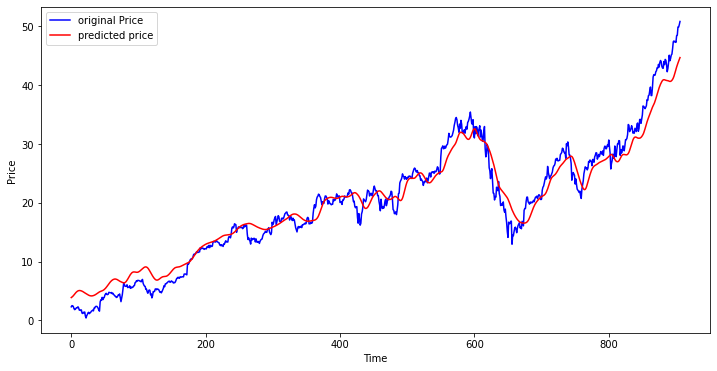

In [35]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b', label = 'original Price')
plt.plot(y_predicted, 'r', label = 'predicted price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()